In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn import metrics


In [ ]:
in_data = pd.read_csv('/content/sample_data/insurance.csv')
in_data.head()
in_data.describe()

In [ ]:
in_data.info()

In [10]:
in_data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Data Analysis


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


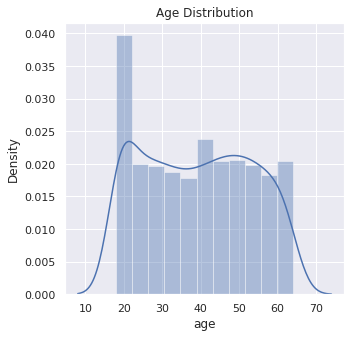

In [18]:
sns.set()
plt.figure(figsize=(5,5))
sns.distplot(in_data['age'])
plt.title('Age Distribution')
plt.show()

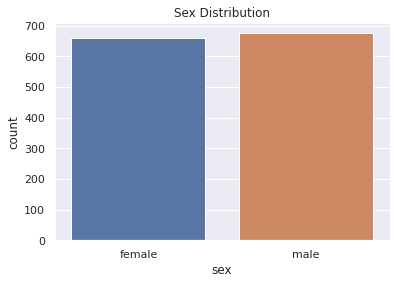

In [21]:
sns.countplot(x='sex',data=in_data)
plt.title('Sex Distribution')
plt.show()

In [23]:
in_data['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


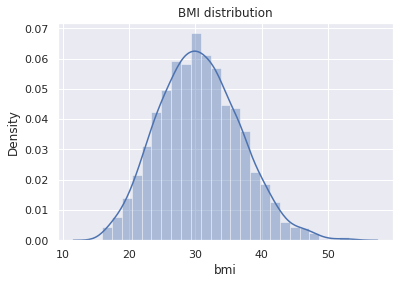

In [24]:
sns.distplot(in_data['bmi'])
plt.title('BMI distribution')
plt.show()

In [28]:
in_data['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

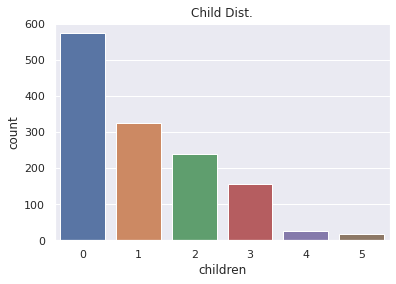

In [29]:
sns.countplot(x='children',data=in_data)
plt.title('Child Dist.')
plt.show()

In [ ]:
sns.countplot(x='region',data=in_data)
plt.title('Region')
plt.show()

In [ ]:
sns.countplot(x='smoker',data=in_data)
plt.title('smoker')
plt.show()

In [ ]:
sns.distplot(in_data['charges'])
plt.title('Charges')
plt.show()

Data Cleaning

In [ ]:
in_data.replace({'sex':{'male': 0, 'female': 1}}, inplace=True)

in_data.replace({'smoker':{'yes': 0, 'no': 1}}, inplace=True)

in_data.replace({'region':{'southeast': 0, 'southwest': 1, 'northeast': 2, 'northwest': 3}}, inplace=True)

in_data.head()

spliting data set 

In [40]:
X = in_data.drop(columns='charges',axis=1)
Y = in_data['charges']

In [41]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=2)

Model training

In [42]:
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

Model Evaluation

In [45]:
ypre = model.predict(x_train)
ypre_1 = model.predict(x_test)
r2_train = metrics.r2_score(y_train,ypre)
r2_train_1 = metrics.r2_score(y_test,ypre_1)
print(r2_train, r2_train_1)

0.751505643411174 0.7447273869684077


Building predictive system

In [48]:
data = (31,1,25.74,0,1,0)
input = np.array(data)
input_1 = input.reshape(1,-1)
pred = model.predict(input_1)
print('predicted value :', pred[0])

predicted value : 3760.080576496064


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


predicted value : 3760.080576496064


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"
